# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [5]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [6]:
# Add any additional import statements you need here
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sadafvaziri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/sadafvaziri/downloads/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [ ]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens else 0
    num_characters = sum(len(token) for token in tokens)

    if verbose:        
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [10]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 5 most common tokens:
  text: 3
  here: 2
  example: 2
  is: 1
  some: 1


Q: Why is it beneficial to use assertion statements in your code? 

A: <!-- Your answer here --> It is beneficial becuase it acts like a self check, making sure the program is working as expected. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [ ]:
# Read in the lyrics data
#cher
import os

def parse_lyrics_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read().strip()

    blocks = content.split('\n\n')
    artist = blocks[0].strip().replace('"', '')
    songs = {}

    for block in blocks[1:]:
        lines = block.strip().split('\n')
        if len(lines) >= 2:
            title = lines[0].strip()
            lyrics = '\n'.join(lines[1:]).strip()
            songs[title] = lyrics

    return artist, songs


lyrics_data = {}

folder_path = "/users/sadafvaziri/downloads/lyrics/cher"

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        path = os.path.join(folder_path, filename)
        artist, songs = parse_lyrics_file(path)
        lyrics_data[artist] = songs




In [12]:
#robyn 
def parse_lyrics_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read().strip()

    blocks = content.split('\n\n')
    artist = blocks[0].strip().replace('"', '')
    songs = {}

    for block in blocks[1:]:
        lines = block.strip().split('\n')
        if len(lines) >= 2:
            title = lines[0].strip()
            lyrics = '\n'.join(lines[1:]).strip()
            songs[title] = lyrics

    return artist, songs

# Example for a folder full of files
lyrics_data = {}

folder_path = "/Users/sadafvaziri/downloads/lyrics/robyn"

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        path = os.path.join(folder_path, filename)
        artist, songs = parse_lyrics_file(path)
        lyrics_data[artist] = songs


In [ ]:
# Read in the twitter data
#Cher
from collections import defaultdict


twitter_data = defaultdict(list)
artist_name = "cher"  

with open("/Users/sadafvaziri/downloads/twitter/cher_followers_data.txt", 'r', encoding='utf-8') as f:
    lines = f.readlines()

header = lines[0].strip().split('\t')
description_idx = header.index("description")


for line in lines[1:]:
    parts = line.strip().split('\t')
    if len(parts) > description_idx:
        desc = parts[description_idx].strip()
        if desc:  # skip empty descriptions
            twitter_data[artist_name].append(desc)



In [15]:
#Robyn
twitter_data = defaultdict(list)
artist_name = "Robyn"  

with open("/Users/sadafvaziri/downloads/twitter/robynkonichiwa_followers_data.txt", 'r', encoding='utf-8') as f:
    lines = f.readlines()

header = lines[0].strip().split('\t')
description_idx = header.index("description")


for line in lines[1:]:
    parts = line.strip().split('\t')
    if len(parts) > description_idx:
        desc = parts[description_idx].strip()
        if desc:  # skip empty descriptions
            twitter_data[artist_name].append(desc)

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [ ]:
punctuation = set(punctuation) # speeds up comparison

In [ ]:
# create your clean twitter data here
#Robyn
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Setup
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Clean and tokenize
cleaned_robyn_descriptions = []

for desc in twitter_data["Robyn"]:
    # Lowercase
    desc = desc.lower()
    
    # Remove punctuation
    desc = ''.join(char for char in desc if char not in punctuation)
    
    # Tokenize (split by whitespace)
    tokens = desc.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Save cleaned token list
    cleaned_robyn_descriptions.append(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sadafvaziri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Cher
import string
from nltk.corpus import stopwords
import nltk


# Setup
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Clean and tokenize
cleaned_cher_descriptions = []

for desc in twitter_data["cher"]:
    # 1. Lowercase
    desc = desc.lower()
    
    # 2. Remove punctuation
    desc = ''.join(char for char in desc if char not in punctuation)
    
    # 3. Tokenize (split on whitespace)
    tokens = desc.split()
    
    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # 5. Append cleaned tokens
    cleaned_cher_descriptions.append(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sadafvaziri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# create your clean lyrics data here
#Robyn
flattened_lyrics_data = {"Robyn": {}}

# Flatten the structure
for filename in lyrics_data:
    for song_title, lyrics in lyrics_data[filename].items():
        # If lyrics is a dict, flatten it
        if isinstance(lyrics, dict):
            lyrics = '\n'.join(lyrics.values())
        flattened_lyrics_data["Robyn"][song_title] = lyrics

# Replace the original data with cleaned structure
lyrics_data = flattened_lyrics_data

rows = []

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

for song_title, lyrics in lyrics_data["Robyn"].items():
    lyrics_clean = lyrics.lower()
    lyrics_clean = ''.join(char for char in lyrics_clean if char not in punctuation)
    tokens = lyrics_clean.split()
    tokens = [word for word in tokens if word not in stop_words]

    rows.append({
        "artist": "Robyn",
        "song": song_title,
        "original_lyrics": lyrics,
        "tokens": tokens
    })

robyn_df = pd.DataFrame(rows)





In [26]:
#Cher
flattened_lyrics_data = {"Cher": {}}

# Flatten Cher's nested structure (if needed)
for filename in lyrics_data:
    for song_title, lyrics in lyrics_data[filename].items():
        if isinstance(lyrics, dict):
            lyrics = '\n'.join(lyrics.values())
        flattened_lyrics_data["Cher"][song_title] = lyrics

# Replace the original with cleaned structure
lyrics_data = flattened_lyrics_data




for song_title, lyrics in lyrics_data["Cher"].items():
    # Step 1: lowercase
    lyrics_clean = lyrics.lower()

    # Step 2: remove punctuation
    lyrics_clean = ''.join(char for char in lyrics_clean if char not in punctuation)

    # Step 3: tokenize
    tokens = lyrics_clean.split()

    # Step 4: remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5: store the row
    rows.append({
        "artist": "Cher",
        "song": song_title,
        "original_lyrics": lyrics,
        "tokens": tokens
    })

cher_df = pd.DataFrame(rows)



## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [35]:
from collections import defaultdict
import string
from nltk.corpus import stopwords

# Setup
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Step 1: Load from file
twitter_data = defaultdict(list)
artist_name = "cher"

with open("/Users/sadafvaziri/downloads/twitter/cher_followers_data.txt", 'r', encoding='utf-8') as f:
    lines = f.readlines()

header = lines[0].strip().split('\t')
description_idx = header.index("description")

for line in lines[1:]:
    parts = line.strip().split('\t')
    if len(parts) > description_idx:
        desc = parts[description_idx].strip()
        if desc:
            twitter_data[artist_name].append(desc)

print(f"Loaded {len(twitter_data['cher'])} descriptions.")  # should now show > 0


cleaned_cher_descriptions = []

for desc in twitter_data["cher"]:
    desc = desc.lower()
    desc = ''.join(char for char in desc if char not in punctuation)
    tokens = desc.split()
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_cher_descriptions.append(tokens)



Loaded 2001090 descriptions.


In [36]:
# calls to descriptive_stats here
#Twitter Cher
cher_twitter_tokens = [token for row in cleaned_cher_descriptions for token in row]
print("\nCher Twitter Stats:")
descriptive_stats(cher_twitter_tokens)



Cher Twitter Stats:
There are 15670504 tokens in the data.
There are 1517718 unique tokens in the data.
There are 92951718 characters in the data.
The lexical diversity is 0.097 in the data.
The 5 most common tokens:
  love: 214576
  im: 139098
  life: 122980
  music: 88177
  de: 72974


[15670504, 1517718, 0.09685189448916257, 92951718]

In [30]:
#Twitter Robyn

robyn_twitter_tokens = [token for row in cleaned_robyn_descriptions for token in row]
print("\nRobyn Twitter Stats:")
descriptive_stats(robyn_twitter_tokens)



Robyn Twitter Stats:
There are 1495526 tokens in the data.
There are 252736 unique tokens in the data.
There are 9127817 characters in the data.
The lexical diversity is 0.169 in the data.
The 5 most common tokens:
  music: 15147
  love: 11677
  im: 9051
  och: 7922
  life: 7383


[1495526, 252736, 0.16899472158959455, 9127817]

In [27]:
#Lyrics Cher

cher_lyrics_tokens = [token for row in cher_df["tokens"] for token in row]
print("Cher Lyrics Stats:")
descriptive_stats(cher_lyrics_tokens)


Cher Lyrics Stats:
There are 15498 tokens in the data.
There are 1855 unique tokens in the data.
There are 75060 characters in the data.
The lexical diversity is 0.120 in the data.
The 5 most common tokens:
  know: 292
  love: 282
  im: 282
  dont: 274
  like: 258


[15498, 1855, 0.11969286359530262, 75060]

In [29]:
#Lyrics Robyn

robyn_lyrics_tokens = [token for row in robyn_df["tokens"] for token in row]
print("\nRobyn Lyrics Stats:")
descriptive_stats(robyn_lyrics_tokens)



Robyn Lyrics Stats:
There are 7749 tokens in the data.
There are 1855 unique tokens in the data.
There are 37530 characters in the data.
The lexical diversity is 0.239 in the data.
The 5 most common tokens:
  know: 146
  love: 141
  im: 141
  dont: 137
  like: 129


[7749, 1855, 0.23938572719060525, 37530]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: With stopwords, the most common words would be words like "the", "I", or "and", which are more common but less meaningful.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: The results partially confirmed these beliefs. Robyn’s lyrics did show higher lexical diversity (0.239 vs. Cher’s 0.120), suggesting she uses a broader vocabulary in her songs. However, Robyn’s Twitter followers also had significantly more diverse language, which may reflect a larger, more engaged or expressive fanbase online.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [6]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [37]:
# Your code here
import emoji
from collections import Counter

def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

# Robyn
robyn_emojis = []

for desc in twitter_data["robyn"]:  # adjust if your key is capitalized
    robyn_emojis.extend(extract_emojis(desc))

robyn_top_emojis = Counter(robyn_emojis).most_common(10)

# Cher
cher_emojis = []

for desc in twitter_data["cher"]:
    cher_emojis.extend(extract_emojis(desc))

cher_top_emojis = Counter(cher_emojis).most_common(10)

# Display results
print("Top 10 Robyn emojis:")
for e, count in robyn_top_emojis:
    print(f"{e}: {count}")

print("\nTop 10 Cher emojis:")
for e, count in cher_top_emojis:
    print(f"{e}: {count}")


Top 10 Robyn emojis:

Top 10 Cher emojis:
❤: 79223
🌈: 47549
♥: 33978
🏳: 33412
✨: 29468
💙: 21379
🏻: 20930
🌊: 20223
✌: 16773
💜: 16550


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [38]:
# Your code here
from collections import Counter

def extract_hashtags(text):
    return [word for word in text.split() if word.startswith("#")]

# Robyn hashtags
robyn_hashtags = []
for desc in twitter_data["robyn"]:  # adjust key as needed
    robyn_hashtags.extend(extract_hashtags(desc.lower()))

robyn_top_hashtags = Counter(robyn_hashtags).most_common(10)

# Cher hashtags
cher_hashtags = []
for desc in twitter_data["cher"]:
    cher_hashtags.extend(extract_hashtags(desc.lower()))

cher_top_hashtags = Counter(cher_hashtags).most_common(10)

# Display results
print("Top 10 Robyn hashtags:")
for tag, count in robyn_top_hashtags:
    print(f"{tag}: {count}")

print("\nTop 10 Cher hashtags:")
for tag, count in cher_top_hashtags:
    print(f"{tag}: {count}")


Top 10 Robyn hashtags:

Top 10 Cher hashtags:
#resist: 9558
#blm: 8753
#blacklivesmatter: 7432
#fbr: 2922
#theresistance: 2883
#resistance: 2405
#1: 2226
#: 1965
#voteblue: 1897
#lgbtq: 1457


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [54]:
def parse_lyrics_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read().strip()

    blocks = content.split('\n\n')
    artist = blocks[0].strip().replace('"', '')
    songs = {}

    for block in blocks[1:]:
        lines = block.strip().split('\n')
        if len(lines) >= 2:
            title = lines[0].strip()
            lyrics = '\n'.join(lines[1:]).strip()
            songs[title] = lyrics

    return artist, songs

# Rebuild Robyn lyrics properly
robyn_lyrics_data = {}
folder_path = "/Users/sadafvaziri/downloads/lyrics/robyn"

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        path = os.path.join(folder_path, filename)
        artist, songs = parse_lyrics_file(path)
        robyn_lyrics_data.update(songs)



cher_lyrics_data = {}
folder_path = "/Users/sadafvaziri/downloads/lyrics/cher"

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        path = os.path.join(folder_path, filename)
        artist, songs = parse_lyrics_file(path)
        cher_lyrics_data.update(songs)

lyrics_data = {
    "Robyn": robyn_lyrics_data,
    "Cher": cher_lyrics_data
}

print("Robyn titles:", list(lyrics_data["Robyn"].keys())[:5])
print("Cher titles:", list(lyrics_data["Cher"].keys())[:5])


Robyn titles: ['It is really very simple', 'Mmm, hmm', 'One time for the records and the hits', 'One time for the sorry and safe', 'Yeah, bow down all you wicked and the vain']
Cher titles: ["I'll send away all my false pride", "All lovers of the past, I'll leave behind", 'The promise I made most faithfully', "Yes I'll be as true as true can be", 'Live a life no others have ever known']


In [55]:
from collections import Counter
import string

def clean_title(title):
    title = title.lower()
    return ''.join(char for char in title if char not in string.punctuation).split()

for artist in ["Cher", "Robyn"]:
    title_words = []
    for title in lyrics_data[artist].keys():
        title_words.extend(clean_title(title))

    top_words = Counter(title_words).most_common(5)

    print(f"\nTop 5 {artist} song title words:")
    for word, count in top_words:
        print(f"{word}: {count}")




Top 5 Cher song title words:
i: 392
you: 347
the: 300
a: 209
to: 179

Top 5 Robyn song title words:
you: 160
i: 119
the: 95
to: 64
me: 62


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

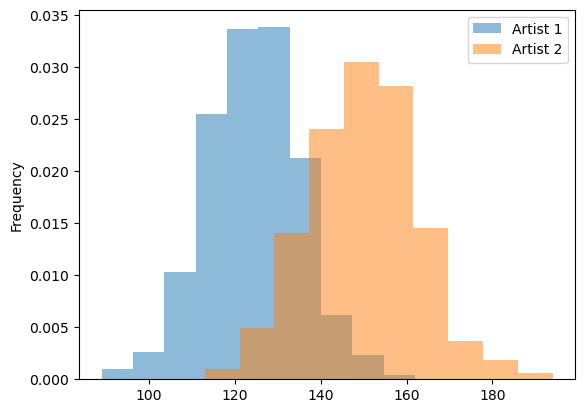

In [56]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression '\s+' matches one or more whitespace characters like spaces, tabs, or newlines. It's useful for cleaning up messy text by collapsing all kinds of spacing into one, so we can split the text into words more easily.


In [57]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

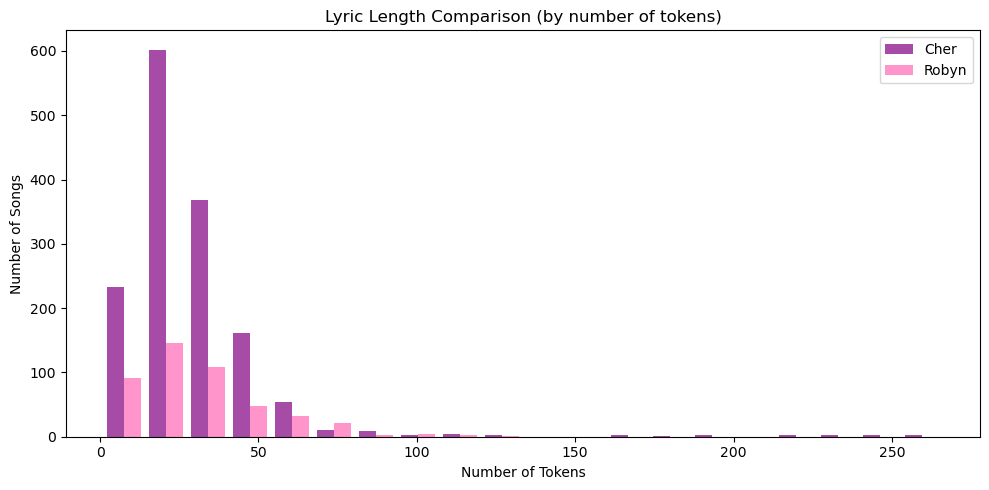

In [58]:
# Your lyric length comparison chart here. 
import matplotlib.pyplot as plt

collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric): 
    """strip and split on whitespace"""
    return [item.lower() for item in collapse_whitespace.split(lyric.strip()) if item]

# Gather song lengths
data = []

for artist in ["Cher", "Robyn"]:
    for title, lyrics in lyrics_data[artist].items():
        tokens = tokenize_lyrics(lyrics)
        data.append({
            "artist": artist,
            "title": title,
            "num_tokens": len(tokens)
        })

# Sort for visual clarity (optional)
data = sorted(data, key=lambda x: x["num_tokens"], reverse=True)

# Plot
cher_lengths = [d["num_tokens"] for d in data if d["artist"] == "Cher"]
robyn_lengths = [d["num_tokens"] for d in data if d["artist"] == "Robyn"]

plt.figure(figsize=(10, 5))
plt.hist([cher_lengths, robyn_lengths], bins=20, label=["Cher", "Robyn"], color=["purple", "hotpink"], alpha=0.7)
plt.title("Lyric Length Comparison (by number of tokens)")
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Songs")
plt.legend()
plt.tight_layout()
plt.show()
